In [3]:
#Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np
from keras.optimizers import Adam

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


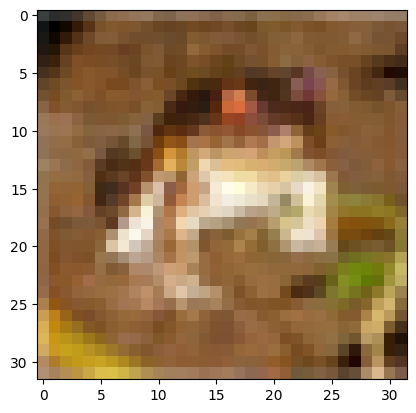

[6]


In [4]:
#load dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train[0])
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [5]:
#preprocess the data
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Single Layer Model

In [6]:
#single hidden layer MLP
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu')) #hidden layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

c:\Users\raghu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1004 - loss: 2.5268 - val_accuracy: 0.1003 - val_loss: 2.3041
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0977 - loss: 2.3036 - val_accuracy: 0.0978 - val_loss: 2.3041
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0968 - loss: 2.3036 - val_accuracy: 0.0978 - val_loss: 2.3030
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0976 - loss: 2.3036 - val_accuracy: 0.1015 - val_loss: 2.3028
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1008 - loss: 2.3036 - val_accuracy: 0.0953 - val_loss: 2.3044
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1000 - loss: 2.3033 - val_accuracy: 0.0953 - val_loss: 2.3039
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1002 - loss: 2.3037 - val_accuracy: 0.1015 - val_loss: 2.3029
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0993 - loss: 2.3036 - val_accuracy: 0.

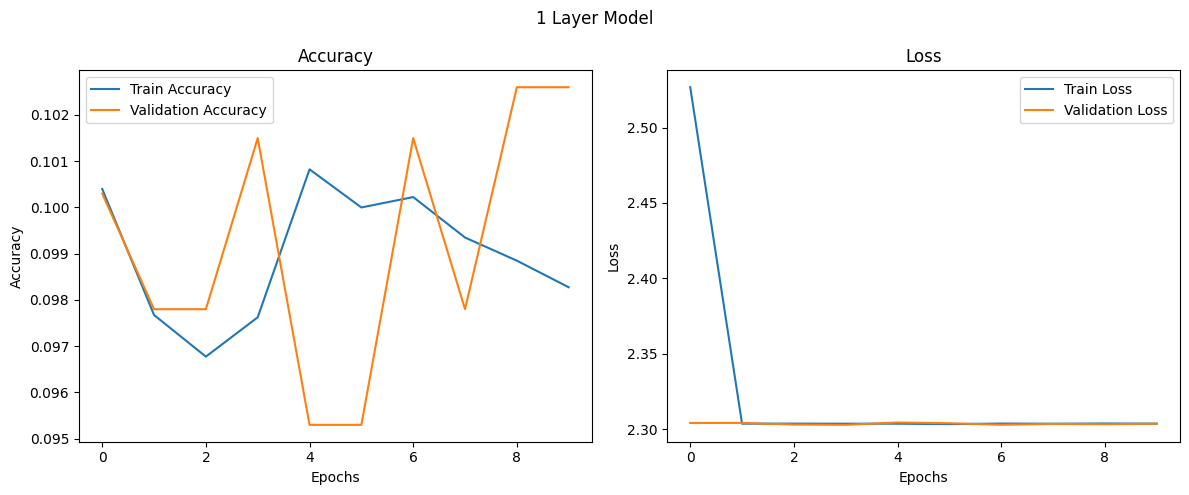

In [7]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('1 Layer Model')
plt.tight_layout()
plt.show()

Three Layer Model

In [8]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(32, 32, 3)))
model_3.add(Dense(512, activation='relu')) #1st hidden layer
model_3.add(Dense(256, activation='relu')) #2nd hidden layer
model_3.add(Dense(128, activation='relu')) #3rd hidden layer
model_3.add(Dense(10, activation='softmax'))
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model_3.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2682 - loss: 2.3395 - val_accuracy: 0.3242 - val_loss: 1.8744
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3236 - loss: 1.8642 - val_accuracy: 0.3222 - val_loss: 1.8472
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3372 - loss: 1.8302 - val_accuracy: 0.3452 - val_loss: 1.8313
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3502 - loss: 1.8074 - val_accuracy: 0.3365 - val_loss: 1.8629
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3544 - loss: 1.8024 - val_accuracy: 0.3573 - val_loss: 1.7820
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3563 - loss: 1.7897 - val_accuracy: 0.3051 - val_loss: 1.9025
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3568 - loss: 1.7864 - val_accuracy: 0.3632 - val_loss: 1.7654
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3508 - loss: 1.7999 - val_accu

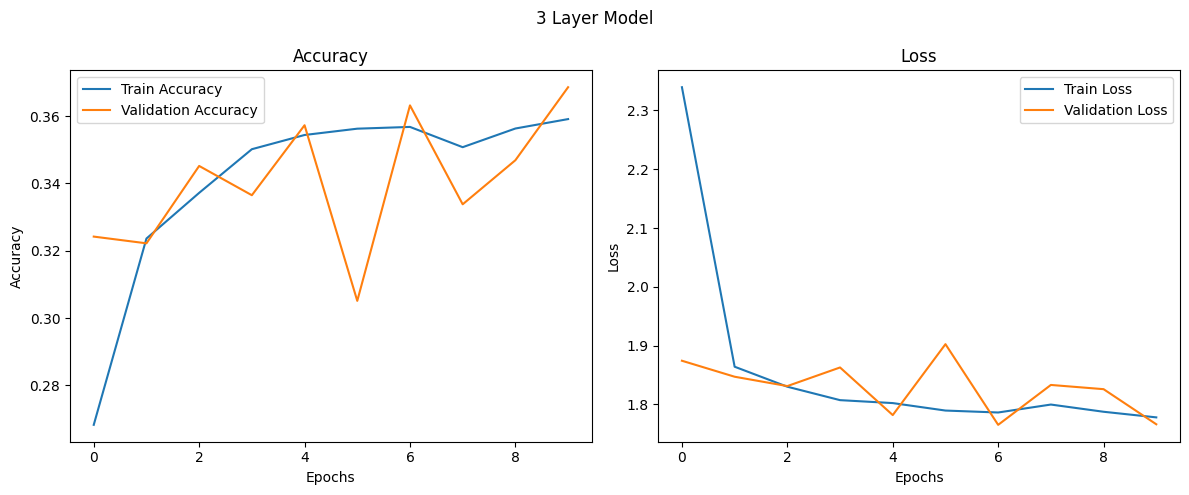

In [9]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('3 Layer Model')
plt.tight_layout()
plt.show()

Five Layer Model

In [10]:
model_5 = Sequential()
model_5.add(Flatten(input_shape=(32, 32, 3)))
model_5.add(Dense(1024, activation='relu')) #5th layer
model_5.add(Dense(512, activation='relu')) #4th layer
model_5.add(Dense(256, activation='relu')) #3rd layer
model_5.add(Dense(128, activation='relu')) #2nd layer
model_5.add(Dense(64, activation='relu')) #1st layer
model_5.add(Dense(10, activation='softmax'))
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
history5 = model_5.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=(0.2))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.1816 - loss: 2.3749 - val_accuracy: 0.2122 - val_loss: 2.0315
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.2096 - loss: 2.0262 - val_accuracy: 0.2260 - val_loss: 2.0199
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.2236 - loss: 2.0001 - val_accuracy: 0.2318 - val_loss: 1.9859
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2376 - loss: 1.9836 - val_accuracy: 0.2151 - val_loss: 2.0027
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.2456 - loss: 1.9593 - val_accuracy: 0.2387 - val_loss: 1.9850
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2513 - loss: 1.9449 - val_accuracy: 0.2519 - val_loss: 1.9560
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2544 - loss: 1.9394 - val_accuracy: 0.2466 - val_loss: 1.9577
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2511 - loss: 1.9422 - 

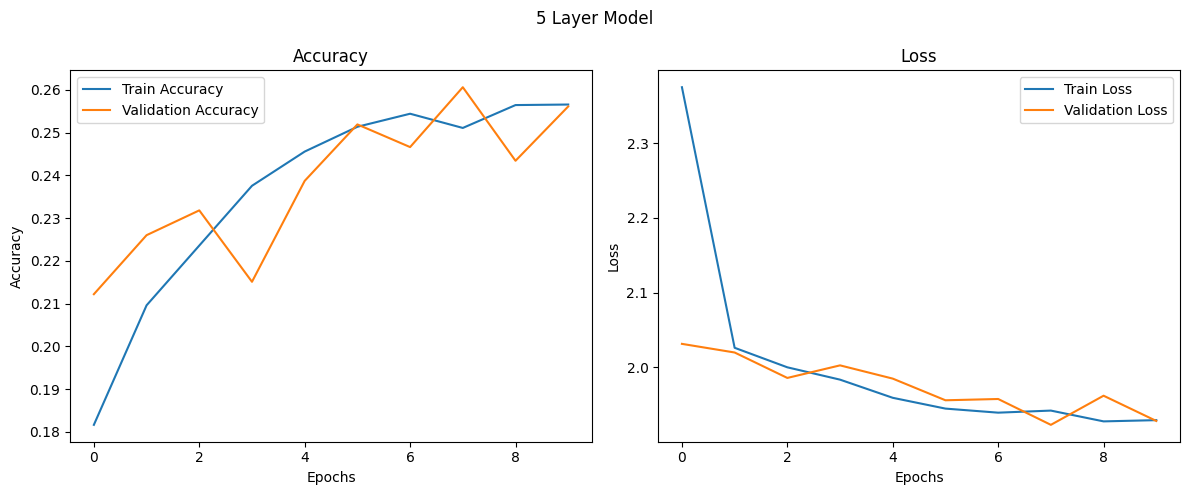

In [11]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history5.history['loss'], label='Train Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.suptitle('5 Layer Model')
plt.tight_layout()
plt.show()

In [12]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
print("Test loss of one layer model:", loss1)
print("Test accuracy of one layer model:", accuracy1)
print()
loss3, accuracy3 = model_3.evaluate(X_test, y_test)
print("Test loss of three layer model:", loss3)
print("Test accuracy of three layer model:", accuracy3)
print()
loss5, accuracy5 = model_5.evaluate(X_test, y_test)
print("Test loss of five layer model:", loss5)
print("Test accuracy of five layer model:", accuracy5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.3035
Test loss of one layer model: 2.303534746170044
Test accuracy of one layer model: 0.10000000149011612

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3712 - loss: 1.7460
Test loss of three layer model: 1.7459921836853027
Test accuracy of three layer model: 0.37119999527931213

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2579 - loss: 1.9208
Test loss of five layer model: 1.9207720756530762
Test accuracy of five layer model: 0.2578999996185303
